**Discrete Event Simulation for Blockchain System of Bitcoin**

Here we begin by importing all the necessary libraries required in the below code for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss 
import random

We go ahead to import our data from our local computer. The following datasets and their real-time values were obtained from www.blockchain.com

In [2]:
#Import Bitcoin Transactions per second, Hash-rate per second and Difficulty of Block mining
mydata = pd.read_csv('C:/Meet College/ISEN 625/Project/Arrival_Times.csv')
data = pd.read_csv('C:/Meet College/ISEN 625/Project/hash-rate.csv')
data2 = pd.read_csv('C:/Meet College/ISEN 625/Project/difficulty.csv')

# We go ahead and fetch interarrival times which we calcualte as 1/transactions_per_second   
times = mydata["Arrival time of each transaction"].tolist()     
# We then go ahead and fetch hash-rate per second values in a list from data as loaded above
ser_rate = data["hash-rate"].tolist()
# We also fetch difficulty values in a list from data2 as loaded above
difficulty = data2["difficulty"].tolist()

**Input Analysis**

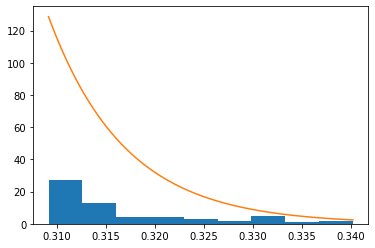

In [30]:
plt.hist(times, bins=9)
expon_fit = ss.expon.fit(times)
expon_array = np.linspace(start = min(times),stop= max(times),num = 600)
expon_pdf = ss.expon.pdf(expon_array,expon_fit[0],expon_fit[1])

plt.plot(expon_array,expon_pdf)
plt.show()

In [31]:
expon_ks = ss.expon(expon_fit[0],expon_fit[1])
KS_fit = ss.kstest(rvs =times, cdf = expon_ks.cdf)
KS_fit

#Since p-value is significantly greater than zero, we do not reject the null hypothesis and it fits the distribution

KstestResult(statistic=0.10374606500937733, pvalue=0.49508296589126477)

We get a p-value which is significantly higher hence we do not reject the null Hypothesis and we conculde that exponential distribution is the adequate fit for our data.

In [5]:
loc_expon_mle, scale_expon_mle = ss.expon.fit(times)
loc_expon_mle, scale_expon_mle

(0.309180911, 0.007774336573770579)

**Model Design**

**Case1: Individual Miner with n different computing nodes**

In [70]:
#Case 1

number_of_blocks = []
mining_time_mean_array = []
avg_transactions_in_block = []
avg_unconfirmed_transactions = []
Total_transactions = []
wait_time_array = []
Total_transactions_array = []
system_throughput_array = []
Time_stamp_array = []

# Here we perform this simulation for various days with 'u' being a counter ranging from o to n days 
for u in range(0,1):
    
    #Here 'limit' is the total number of transactions coming in the memory pool for an entire a day
    limit = 500000
    # We generate random exponential interarrival times with giving loc_expon_mle as parameter with size equal to the 'limit'
    expon_times = np.random.exponential(loc_expon_mle,size=limit)
    # We form an array of transactions with keeping the count of transactions in the Memory pool for every interarrival time.
    mempool_count = np.arange(1,limit+1)
    
    
    # MemoryPool
    waittime_clock=[]
    block_mining_time_array = []
    transactions_in_block = []
    block_mining_time_array_replication = []
    summation = []
    unconfirmed_transactions = []
    clock_for_waittime = []
    block_count=[]
    
    # We create an array of clock times which gives us the times at which we have an arrival of transaction in the memorypool
    clock = np.cumsum(expon_times)
    x=0
    y=0
    z=0
    
    # Number of computers(nodes) that the Miner has.
    nodes = 6
    
    # To check on all values of time clock and the Mempool count we run a for loop on both the arrays over their length
    for i,j in zip(range(0,len(clock)),range(0,len(mempool_count))):
        
                    
        # Finding all other statistics for within a day of transaction arrivals
        
            
        # Using a conditional IF statement to form a block of transactions whenever the clock hits 600 seconds or number of transactions count get accumuated and reach 2100
        # Also in order to only consider those transactions which come within the 24 hour period
        # We only allow a block to start forming only after the previous block is mined, hence we use 'x' to keep a check on the clock
        # Similarly to regulate the transactions count as per the block mining time we use 'z'

        if (clock[i]-x >= 600 or mempool_count[j]-z>=2100) and clock[i]-x>0 and clock[i]<24*3600:
            # We use 'y' to keep a check on the number of blocks mined which was initialized as zero at the start
            y=y+1

            # To check the number of transactions in each block we create an array and append the values of their count as below
            transactions_in_block.append(mempool_count[j]-z)

            #print(f"A block is formed in {round(clock[i]-x,3)} seconds and at a timestamp of {round(clock[i],3)} seconds,number of blocks formed until this timestamp is/are {y} and number of transactions in this block formed are {mempool_count[j]-z}")

            # To append an array of times at which a block if formed from a memory pool
            clock_for_waittime.append(clock[i])

            z=mempool_count[j]






            # MiningPool

            # Here we generate service rate for all the nodes of the Miner using Triangular Distribution with its min,mode and max values obtaining from the real-time values of the dataset we loaded above for Hash-rate
            service_rate = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=nodes)  # It can guess a hash in this much time
            # We calculate the Block Mining time for each node using the average difficulty value as '2.18013E+13' and service rate of each node 
            # Converting TeraHash/s as Hash/s

            c = (2**32)*(2.18013E+13)/(service_rate)/(10**12)  

            # We take the maximum of all the block mining times as the Block Mining time for the Miner as all the nodes work parallely
            block_mining_time = max(c)

            #print(f"The block Mining time for Case1 is {block_mining_time}")             # The value should be average around 600 seconds
            #print(f"The timestamp when the block is mined completely is {block_mining_time+clock[i]+x}")
            #print("")

            # Setting the time clock to the new time as time taken to mine the block + time at which block is formed
            x=block_mining_time + clock[i]

            # Creatin an array of all the block_mining times for different blocks
            block_mining_time_array.append(block_mining_time)
            # Taking the mean value of all the times for a day
            mining_time_mean = np.mean(block_mining_time_array)
            Time_stamp_array.append(x)
                
                
    
    
    # We calculate all the statistics as below
    
    Total_transactions = np.sum(transactions_in_block)
    Total_transactions_array.append(Total_transactions)
    avg_transactions = np.mean(transactions_in_block)   
    number_of_blocks.append(y)
    mining_time_mean_array.append(mining_time_mean)
    avg_transactions_in_block.append(avg_transactions)
    system_throughput = Total_transactions/(np.sum(number_of_blocks))/619
    system_throughput_array.append(system_throughput)
print(f"Average number of transactions for each day over a period {u+1} days is {np.mean(Total_transactions_array)}")
print(f"Average system throughput for each day over a period {u+1} days is {np.mean(system_throughput_array)}")
print(f"Average number of blocks mined each day for a period {u+1} days is {np.mean(number_of_blocks)}")
print(f"Average value of block mining time over a period of {u+1} days is {np.mean(mining_time_mean_array)}")
print(f"Average number of transactions in a block over a period of {u+1} days is {np.mean(avg_transactions_in_block)}")

Average number of transactions for each day over a period 1 days is 277563.0
Average system throughput for each day over a period 1 days is 3.397011308562197
Average number of blocks mined each day for a period 1 days is 132.0
Average value of block mining time over a period of 1 days is 617.0053027546942
Average number of transactions in a block over a period of 1 days is 2102.75


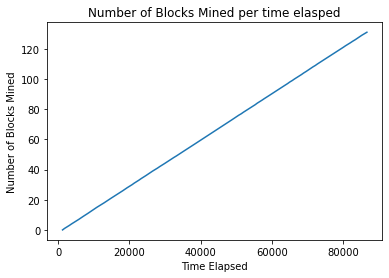

In [72]:
plt.plot(Time_stamp_array,np.arange(0,len(Time_stamp_array),1))
plt.xlabel('Time Elapsed')
plt.ylabel('Number of Blocks Mined')
plt.title('Number of Blocks Mined per time elasped')
plt.show()

**Case3: Group of Miner's working by competiting with each other**

In [65]:

number_of_blocks = []
mining_time_mean_array = []
avg_transactions_in_block = []
winning_miner_array = []
system_throughput_array = []
Total_transactions_array = []
Cost_array = []
Cost_Miner1_array = []
Cost_Miner2_array = []
Cost_Miner3_array = []
Cost_Miner4_array = []
Cost_Miner5_array = []

# Here to begin with we randomly choose a difficulty value from dataset we load above
diffi_asc = np.random.choice(difficulty,size=1,replace=False)    

# Here we perform this simulation for various days with 'u' being a counter ranging from o to n days 
for u in range(0,15):
    
    #Here 'limit' is the total number of transactions coming in the memory pool for an entire a day
    limit = 500000
    # We generate random exponential interarrival times with giving loc_expon_mle as parameter with size equal to the 'limit'
    expon_times = np.random.exponential(loc_expon_mle,size=limit)    # Generating an array with a high size value
    # We form an array of transactions with keeping the count of transactions in the Memory pool for every interarrival time.
    mempool_count = np.arange(1,limit+1)
    
    
    # MemoryPool
    waittime_clock=[]
    block_mining_time_array = []
    transactions_in_block = []
    block_mining_time_array_replication = []
    block_count=[]
    # We create an array of clock times which gives us the times at which we have an arrival of transaction in the memorypool
    clock = np.cumsum(expon_times)
    x=0
    y=0
    z=0
    
    # Number of computers(nodes) that the Miner has.
    nodes = 6
    
    # To check on all values of time clock and the Mempool count we run a for loop on both the arrays over their length
    for i,j in zip(range(0,len(clock)),range(0,len(mempool_count))):
        # Finding all other statistics for within a day of transaction arrivals
        
            
        # Using a conditional IF statement to form a block of transactions whenever the clock hits 600 seconds or number of transactions count get accumuated and reach 2100
        # Also in order to only consider those transactions which come within the 24 hour period
        # We only allow a block to start forming only after the previous block is mined, hence we use 'x' to keep a check on the clock
        # Similarly to regulate the transactions count as per the block mining time we use 'z'

        if (clock[i]-x >= 600 or mempool_count[j]-z>=2100) and clock[i]-x>0 and clock[i]<24*3600:
            # We use 'y' to keep a check on the number of blocks mined which was initialized as zero at the start

            y=y+1

            # To check the number of transactions in each block
            transactions_in_block.append(mempool_count[j]-z)
            avg_transactions = np.mean(transactions_in_block)
            #print(f"A block is formed at a timestamp of {round(clock[i]+x,3)} seconds,number of blocks formed until this timestamp is/are {y} and number of transactions in this block formed are {mempool_count[j]-z}")
            z=mempool_count[j]
            # To append an array of times at which a block if formed from a memory pool
            waittime_clock.append(clock[i]+x)



            # Mining Pool

            # Here we simulate with 5 miners each having 6 nodes
            miners = 5
            nodes_case3 = 30
            nodes_per_miner = nodes_case3//miners

            # We calculate the service rate considering triangular distribution for each miner for all it's nodes and generate an array of them
            service_rate_node_per_miner1 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=nodes_per_miner)  # It can guess a hash in this much time
            service_rate_node_per_miner2 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=nodes_per_miner)  # It can guess a hash in this much time
            service_rate_node_per_miner3 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=nodes_per_miner)  # It can guess a hash in this much time
            service_rate_node_per_miner4 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=nodes_per_miner)  # It can guess a hash in this much time
            service_rate_node_per_miner5 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=nodes_per_miner)  # It can guess a hash in this much time

            # We calculate the mean value of this serivce rates for each miner
            Mining_power_1 = np.mean(service_rate_node_per_miner1)
            Mining_power_2 = np.mean(service_rate_node_per_miner2)
            Mining_power_3 = np.mean(service_rate_node_per_miner3)
            Mining_power_4 = np.mean(service_rate_node_per_miner4)
            Mining_power_5 = np.mean(service_rate_node_per_miner5)

            # Create an array of all this mean values for all miners
            Power_array = [Mining_power_1,Mining_power_2,Mining_power_3,Mining_power_4,Mining_power_5]

            # We calculate the block mining time similarly as case 1, here we take the maximum block mining time out of all nodes for each miner. As here we consider parallel computing for the tasks
            c_array1 = []
            for j in range(0,len(service_rate_node_per_miner1)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner1[j])/(10**12)
                c_array1.append(c)
            mining_time_miner1 = np.max(c_array1)   
            Total_mining_time_miner1 = max(c_array1)

            c_array2 = []
            for j in range(0,len(service_rate_node_per_miner2)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner2[j])/(10**12)
                c_array2.append(c)
            mining_time_miner2 = np.max(c_array2)   
            Total_mining_time_miner2 = max(c_array2)

            c_array3 = []
            for j in range(0,len(service_rate_node_per_miner3)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner3[j])/(10**12)
                c_array3.append(c)
            mining_time_miner3 = np.max(c_array3)   
            Total_mining_time_miner3 = max(c_array3)

            c_array4 = []
            for j in range(0,len(service_rate_node_per_miner4)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner4[j])/(10**12)
                c_array4.append(c)
            mining_time_miner4 = np.max(c_array4)   
            Total_mining_time_miner4 = max(c_array4)

            c_array5 = []
            for j in range(0,len(service_rate_node_per_miner5)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner5[j])/(10**12)
                c_array5.append(c)
            mining_time_miner5 = np.max(c_array5)   
            Total_mining_time_miner5 = max(c_array5)

            # We create an array with all this max block mining time values for all 5 miner's as below

            Time_array = [Total_mining_time_miner1,Total_mining_time_miner2,Total_mining_time_miner3,Total_mining_time_miner4,Total_mining_time_miner5]

            # Calculate the cost to mine a block for each miner by multiplying the service rate of each miner with the block mining time and '1.75*E-6' which is USD/TH/s 
            for w,q in zip(range(0,len(Power_array)),range(0,len(Time_array))):
                Cost_array.append(Power_array[w]*Time_array[q]*(1.75)*(0.000001))

            # We create an array with all this max block mining time values for all 5 miner's as below 
            miner_time = [mining_time_miner1,mining_time_miner2,mining_time_miner3,mining_time_miner4,mining_time_miner5]
            # array of number of miners
            miner_id = [1,2,3,4,5]

            # Dictionary of miner time and thier id's
            dict_array = dict(zip(miner_time,miner_id))
            # The miner who mines the block in the minimum time wins the Bitcoin reward for minig that block
            winning_miner = dict_array[min(miner_time)]
            # Create an array for all winning miners who mine the block in minimum time
            winning_miner_array.append(winning_miner)
            #print(f"The block Mining time for Case3 is {block_mining_time_case3}")   # Thus in case 3 we highlight the decision choices which a miner can take as per the nodes available and as the miners would be competing among themselves one who solves the puzzle first goes ahead to mine the block and adds it to the end of the blockchain 


            # Setting the time clock to the new time as time taken to mine the block + time at which block is formed
            x=min(miner_time)+clock[i]
            # Creatin an array of all the block_mining times for different blocks
            block_mining_time_array.append(min(miner_time))
            # Taking the mean value of all the times for a day
            mining_time_mean = np.mean(block_mining_time_array)
    #print(Cost_array)
    
    # Number of times a specific miner wins
    Total_transactions = np.sum(transactions_in_block)
    Total_transactions_array.append(Total_transactions)
    (unique, counts) = np.unique(winning_miner_array, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    frequencies[:,1]
    number_of_blocks.append(y)
    mining_time_mean_array.append(mining_time_mean)
    avg_transactions_in_block.append(avg_transactions)
    system_throughput = Total_transactions/(np.sum(number_of_blocks))/np.mean(mining_time_mean_array)
    system_throughput_array.append(system_throughput)

    
    # Here we regulate the difficulty on the basis of total number of blocks mined for last 14 days and use this new difficulty value for next 14 days
    if u== 14 or 28:
        D=diffi_asc*(np.sum(block_mining_time_array))/(number_of_blocks[-1]*(np.mean(mining_time_mean_array)))
        diffi_asc = D

# We calculate the total cost each miner bears for mining all the blocks for everyday        
for c1 in np.arange(0,len(Cost_array),5):
    Cost_Miner1_array.append(Cost_array[c1])
    Cost_Miner1 = np.sum(Cost_Miner1_array)
for c2 in np.arange(1,len(Cost_array),5):
    Cost_Miner2_array.append(Cost_array[c2])
    Cost_Miner2 = np.sum(Cost_Miner2_array)
for c3 in np.arange(2,len(Cost_array),5):
    Cost_Miner3_array.append(Cost_array[c3])
    Cost_Miner3 = np.sum(Cost_Miner3_array)
for c4 in np.arange(3,len(Cost_array),5):
    Cost_Miner4_array.append(Cost_array[c4])
    Cost_Miner4 = np.sum(Cost_Miner4_array)
for c5 in np.arange(4,len(Cost_array),5):
    Cost_Miner5_array.append(Cost_array[c5])
    Cost_Miner5 = np.sum(Cost_Miner5_array)

# We create an array for total costs of each miner
Cost_per_miner = [Cost_Miner1,Cost_Miner2,Cost_Miner3,Cost_Miner4,Cost_Miner5]

# Income for each miner is the reward of 6.25 Bitoin that it earns calculating as per its current USD value
income = frequencies[:,1]*300000

# Calculate the Revenue for each miner
Revenue = income-Cost_per_miner

# Calculate the Statistics as below
print(f"Average number of Total transactions for each day over a period {u+1} days is {round(np.mean(Total_transactions_array),3)}")
CI_1 = ss.norm.interval(alpha=0.95, loc=np.mean(Total_transactions_array), scale=ss.sem(Total_transactions_array))
print(f"Confidence interval : {round(CI_1[0],3),round(CI_1[1],3)}")

print(f"Average system throughput for each day over a period {u+1} days is {round(np.mean(system_throughput_array),3)}")
CI_2 = ss.norm.interval(alpha=0.95, loc=np.mean(system_throughput_array), scale=ss.sem(system_throughput_array))
print(f"Confidence interval : {round(CI_2[0],3),round(CI_2[1],3)}")

print(f"Amount of income generated at winning rate of 6.25 Bitcoins for each miner is {income}")
print(f"Cost per miner for performing Mining of blocks for {u+1} days is {Cost_per_miner} respectively")
print(f"Revenue for each miner is {Revenue}")

print(f"Average number of blocks mined each day for a period {u+1} days is {round(np.mean(number_of_blocks),3)}")
CI_3 = ss.norm.interval(alpha=0.95, loc=np.mean(number_of_blocks), scale=ss.sem(number_of_blocks))
print(f"Confidence interval : {round(CI_3[0],3),round(CI_3[1],3)}")

print(f"Average value of block mining time over a period of {u+1} days is {round(np.mean(mining_time_mean_array),3)}")
CI_4 = ss.norm.interval(alpha=0.95, loc=np.mean(mining_time_mean_array), scale=ss.sem(mining_time_mean_array))
print(f"Confidence interval : {round(CI_4[0],3),round(CI_4[1],3)}")

print(f"Average number of transactions in a block over a period of {u+1} days is {round(np.mean(avg_transactions_in_block),3)}")
CI_5 = ss.norm.interval(alpha=0.95, loc=np.mean(avg_transactions_in_block), scale=ss.sem(avg_transactions_in_block))
print(f"Confidence interval : {round(CI_5[0],3),round(CI_5[1],3)}")

Average number of Total transactions for each day over a period 15 days is 278731.0
Confidence interval : (278279.083, 279182.917)
Average system throughput for each day over a period 15 days is 0.797
Confidence interval : (0.357, 1.237)
Amount of income generated at winning rate of 6.25 Bitcoins for each miner is [118200000 115200000 122100000 125100000 117000000]
Cost per miner for performing Mining of blocks for 15 days is [297563130.6200981, 297586475.2579182, 297454906.34955037, 297491622.01561505, 297438792.3345802] respectively
Revenue for each miner is [-1.79363131e+08 -1.82386475e+08 -1.75354906e+08 -1.72391622e+08
 -1.80438792e+08]
Average number of blocks mined each day for a period 15 days is 132.8
Confidence interval : (132.59, 133.01)
Average value of block mining time over a period of 15 days is 503.526
Confidence interval : (432.952, 574.101)
Average number of transactions in a block over a period of 15 days is 2098.878
Confidence interval : (2098.712, 2099.043)


**Visualization Plots**

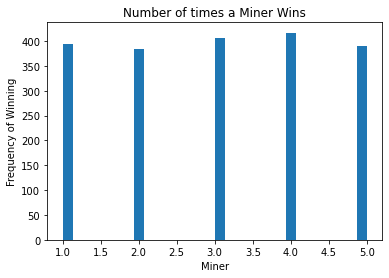

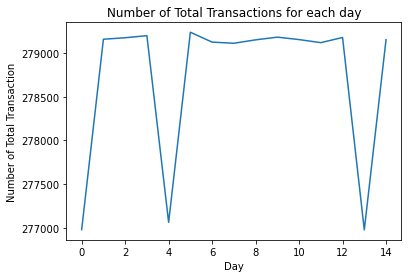

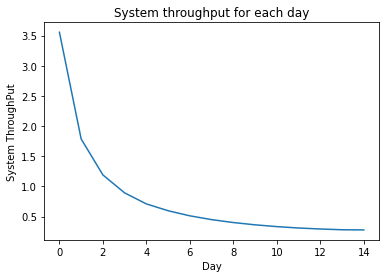

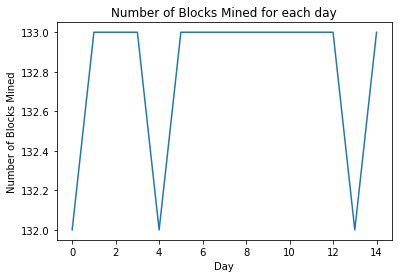

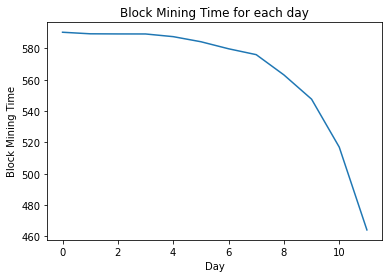

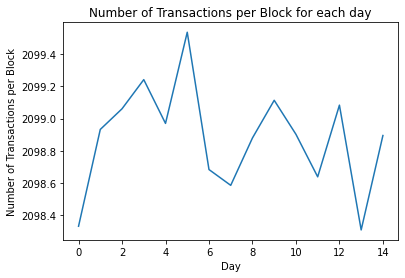

In [69]:
# Histogram for Number of times a miner wins
import matplotlib.pyplot as plt
plt.hist(winning_miner_array,bins=30)
plt.xlabel('Miner')
plt.ylabel('Frequency of Winning')
plt.title('Number of times a Miner Wins')
plt.show()

plt.plot(np.arange(0,len(Total_transactions_array),1),Total_transactions_array)
plt.xlabel('Day')
plt.ylabel('Number of Total Transaction')
plt.title('Number of Total Transactions for each day')
plt.show()

plt.plot(np.arange(0,len(system_throughput_array),1),system_throughput_array)
plt.xlabel('Day')
plt.ylabel('System ThroughPut')
plt.title('System throughput for each day')
plt.show()

plt.plot(np.arange(0,len(number_of_blocks),1),number_of_blocks)
plt.xlabel('Day')
plt.ylabel('Number of Blocks Mined')
plt.title('Number of Blocks Mined for each day')
plt.show()

plt.plot(np.arange(0,len(mining_time_mean_array)-3,1),mining_time_mean_array[0:12])     # In order to remove outliers from the graph
plt.xlabel('Day')
plt.ylabel('Block Mining Time')
plt.title('Block Mining Time for each day')
plt.show()

plt.plot(np.arange(0,len(avg_transactions_in_block),1),avg_transactions_in_block)
plt.xlabel('Day')
plt.ylabel('Number of Transactions per Block')
plt.title('Number of Transactions per Block for each day')
plt.show()

**Here we try to check Case 3 with different node parameters for 3 Days**

In [82]:

number_of_blocks = []
mining_time_mean_array = []
avg_transactions_in_block = []
winning_miner_array = []
system_throughput_array = []
Total_transactions_array = []
Cost_array = []
Cost_Miner1_array = []
Cost_Miner2_array = []
Cost_Miner3_array = []
Cost_Miner4_array = []
Cost_Miner5_array = []

# Here to begin with we randomly choose a difficulty value from dataset we load above
diffi_asc = np.random.choice(difficulty,size=1,replace=False)    

# Here we perform this simulation for various days with 'u' being a counter ranging from o to n days 
for u in range(0,3):
    
    #Here 'limit' is the total number of transactions coming in the memory pool for an entire a day
    limit = 500000
    # We generate random exponential interarrival times with giving loc_expon_mle as parameter with size equal to the 'limit'
    expon_times = np.random.exponential(loc_expon_mle,size=limit)    # Generating an array with a high size value
    # We form an array of transactions with keeping the count of transactions in the Memory pool for every interarrival time.
    mempool_count = np.arange(1,limit+1)
    
    
    # MemoryPool
    waittime_clock=[]
    block_mining_time_array = []
    transactions_in_block = []
    block_mining_time_array_replication = []
    block_count=[]
    # We create an array of clock times which gives us the times at which we have an arrival of transaction in the memorypool
    clock = np.cumsum(expon_times)
    x=0
    y=0
    z=0
    
    # Number of computers(nodes) that the Miner has.
    nodes = 6
    
    # To check on all values of time clock and the Mempool count we run a for loop on both the arrays over their length
    for i,j in zip(range(0,len(clock)),range(0,len(mempool_count))):
        # Finding all other statistics for within a day of transaction arrivals
        
            
        # Using a conditional IF statement to form a block of transactions whenever the clock hits 600 seconds or number of transactions count get accumuated and reach 2100
        # Also in order to only consider those transactions which come within the 24 hour period
        # We only allow a block to start forming only after the previous block is mined, hence we use 'x' to keep a check on the clock
        # Similarly to regulate the transactions count as per the block mining time we use 'z'

        if (clock[i]-x >= 600 or mempool_count[j]-z>=2100) and clock[i]-x>0 and clock[i]<24*3600:
            # We use 'y' to keep a check on the number of blocks mined which was initialized as zero at the start

            y=y+1

            # To check the number of transactions in each block
            transactions_in_block.append(mempool_count[j]-z)
            avg_transactions = np.mean(transactions_in_block)
            #print(f"A block is formed at a timestamp of {round(clock[i]+x,3)} seconds,number of blocks formed until this timestamp is/are {y} and number of transactions in this block formed are {mempool_count[j]-z}")
            z=mempool_count[j]
            # To append an array of times at which a block if formed from a memory pool
            waittime_clock.append(clock[i]+x)



            # Mining Pool

            # Here we simulate with 5 miners each having 6 nodes
            miners = [5,5,5,5,5]
            nodes_case3 = [25,30,35,40,45]
            nodes_per_miner = np.divide(nodes_case3,miners)

            # We calculate the service rate considering triangular distribution for each miner for all it's nodes and generate an array of them
            service_rate_node_per_miner1 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=int(nodes_per_miner[0]))  # It can guess a hash in this much time
            service_rate_node_per_miner2 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=int(nodes_per_miner[1]))  # It can guess a hash in this much time
            service_rate_node_per_miner3 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=int(nodes_per_miner[2]))  # It can guess a hash in this much time
            service_rate_node_per_miner4 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=int(nodes_per_miner[3]))  # It can guess a hash in this much time
            service_rate_node_per_miner5 = np.random.triangular(np.min(ser_rate),170117315.7,np.max(ser_rate),size=int(nodes_per_miner[4]))  # It can guess a hash in this much time

            # We calculate the mean value of this serivce rates for each miner
            Mining_power_1 = np.mean(service_rate_node_per_miner1)
            Mining_power_2 = np.mean(service_rate_node_per_miner2)
            Mining_power_3 = np.mean(service_rate_node_per_miner3)
            Mining_power_4 = np.mean(service_rate_node_per_miner4)
            Mining_power_5 = np.mean(service_rate_node_per_miner5)

            # Create an array of all this mean values for all miners
            Power_array = [Mining_power_1,Mining_power_2,Mining_power_3,Mining_power_4,Mining_power_5]

            # We calculate the block mining time similarly as case 1, here we take the maximum block mining time out of all nodes for each miner. As here we consider parallel computing for the tasks
            c_array1 = []
            for j in range(0,len(service_rate_node_per_miner1)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner1[j])/(10**12)
                c_array1.append(c)
            mining_time_miner1 = np.max(c_array1)   
            Total_mining_time_miner1 = max(c_array1)

            c_array2 = []
            for j in range(0,len(service_rate_node_per_miner2)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner2[j])/(10**12)
                c_array2.append(c)
            mining_time_miner2 = np.max(c_array2)   
            Total_mining_time_miner2 = max(c_array2)

            c_array3 = []
            for j in range(0,len(service_rate_node_per_miner3)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner3[j])/(10**12)
                c_array3.append(c)
            mining_time_miner3 = np.max(c_array3)   
            Total_mining_time_miner3 = max(c_array3)

            c_array4 = []
            for j in range(0,len(service_rate_node_per_miner4)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner4[j])/(10**12)
                c_array4.append(c)
            mining_time_miner4 = np.max(c_array4)   
            Total_mining_time_miner4 = max(c_array4)

            c_array5 = []
            for j in range(0,len(service_rate_node_per_miner5)):
                c = (2**32)*(diffi_asc)/(service_rate_node_per_miner5[j])/(10**12)
                c_array5.append(c)
            mining_time_miner5 = np.max(c_array5)   
            Total_mining_time_miner5 = max(c_array5)

            # We create an array with all this max block mining time values for all 5 miner's as below

            Time_array = [Total_mining_time_miner1,Total_mining_time_miner2,Total_mining_time_miner3,Total_mining_time_miner4,Total_mining_time_miner5]

            # Calculate the cost to mine a block for each miner by multiplying the service rate of each miner with the block mining time and '1.75*E-6' which is USD/TH/s 
            for w,q in zip(range(0,len(Power_array)),range(0,len(Time_array))):
                Cost_array.append(Power_array[w]*Time_array[q]*(1.75)*(0.000001))

            # We create an array with all this max block mining time values for all 5 miner's as below 
            miner_time = [mining_time_miner1,mining_time_miner2,mining_time_miner3,mining_time_miner4,mining_time_miner5]
            # array of number of miners
            miner_id = [1,2,3,4,5]

            # Dictionary of miner time and thier id's
            dict_array = dict(zip(miner_time,miner_id))
            # The miner who mines the block in the minimum time wins the Bitcoin reward for minig that block
            winning_miner = dict_array[min(miner_time)]
            # Create an array for all winning miners who mine the block in minimum time
            winning_miner_array.append(winning_miner)
            #print(f"The block Mining time for Case3 is {block_mining_time_case3}")   # Thus in case 3 we highlight the decision choices which a miner can take as per the nodes available and as the miners would be competing among themselves one who solves the puzzle first goes ahead to mine the block and adds it to the end of the blockchain 


            # Setting the time clock to the new time as time taken to mine the block + time at which block is formed
            x=min(miner_time)+clock[i]
            # Creatin an array of all the block_mining times for different blocks
            block_mining_time_array.append(min(miner_time))
            # Taking the mean value of all the times for a day
            mining_time_mean = np.mean(block_mining_time_array)
    #print(Cost_array)
    
    # Number of times a specific miner wins
    Total_transactions = np.sum(transactions_in_block)
    Total_transactions_array.append(Total_transactions)
    (unique, counts) = np.unique(winning_miner_array, return_counts=True)
    frequencies = np.asarray((unique, counts)).T
    frequencies[:,1]
    number_of_blocks.append(y)
    mining_time_mean_array.append(mining_time_mean)
    avg_transactions_in_block.append(avg_transactions)
    system_throughput = Total_transactions/(np.sum(number_of_blocks))/np.mean(mining_time_mean_array)
    system_throughput_array.append(system_throughput)

    
    # Here we regulate the difficulty on the basis of total number of blocks mined for last 14 days and use this new difficulty value for next 14 days
    if u== 14 or 28:
        D=diffi_asc*(np.sum(block_mining_time_array))/(number_of_blocks[-1]*(np.mean(mining_time_mean_array)))
        diffi_asc = D

# We calculate the total cost each miner bears for mining all the blocks for everyday        
for c1 in np.arange(0,len(Cost_array),5):
    Cost_Miner1_array.append(Cost_array[c1])
    Cost_Miner1 = np.sum(Cost_Miner1_array)
for c2 in np.arange(1,len(Cost_array),5):
    Cost_Miner2_array.append(Cost_array[c2])
    Cost_Miner2 = np.sum(Cost_Miner2_array)
for c3 in np.arange(2,len(Cost_array),5):
    Cost_Miner3_array.append(Cost_array[c3])
    Cost_Miner3 = np.sum(Cost_Miner3_array)
for c4 in np.arange(3,len(Cost_array),5):
    Cost_Miner4_array.append(Cost_array[c4])
    Cost_Miner4 = np.sum(Cost_Miner4_array)
for c5 in np.arange(4,len(Cost_array),5):
    Cost_Miner5_array.append(Cost_array[c5])
    Cost_Miner5 = np.sum(Cost_Miner5_array)

# We create an array for total costs of each miner
Cost_per_miner = [Cost_Miner1,Cost_Miner2,Cost_Miner3,Cost_Miner4,Cost_Miner5]

# Income for each miner is the reward of 6.25 Bitoin that it earns calculating as per its current USD value
income = frequencies[:,1]*300000

# Calculate the Revenue for each miner
Revenue = income-Cost_per_miner

# Calculate the Statistics as below
print(f"Average number of Total transactions for each day over a period {u+1} days is {round(np.mean(Total_transactions_array),3)}")
CI_1 = ss.norm.interval(alpha=0.95, loc=np.mean(Total_transactions_array), scale=ss.sem(Total_transactions_array))
print(f"Confidence interval : {round(CI_1[0],3),round(CI_1[1],3)}")

print(f"Average system throughput for each day over a period {u+1} days is {round(np.mean(system_throughput_array),3)}")
CI_2 = ss.norm.interval(alpha=0.95, loc=np.mean(system_throughput_array), scale=ss.sem(system_throughput_array))
print(f"Confidence interval : {round(CI_2[0],3),round(CI_2[1],3)}")

print(f"Amount of income generated at winning rate of 6.25 Bitcoins for each miner is {income}")
print(f"Cost per miner for performing Mining of blocks for {u+1} days is {Cost_per_miner} respectively")
print(f"Revenue for each miner is {Revenue}")

print(f"Average number of blocks mined each day for a period {u+1} days is {round(np.mean(number_of_blocks),3)}")
CI_3 = ss.norm.interval(alpha=0.95, loc=np.mean(number_of_blocks), scale=ss.sem(number_of_blocks))
print(f"Confidence interval : {round(CI_3[0],3),round(CI_3[1],3)}")

print(f"Average value of block mining time over a period of {u+1} days is {round(np.mean(mining_time_mean_array),3)}")
CI_4 = ss.norm.interval(alpha=0.95, loc=np.mean(mining_time_mean_array), scale=ss.sem(mining_time_mean_array))
print(f"Confidence interval : {round(CI_4[0],3),round(CI_4[1],3)}")

print(f"Average number of transactions in a block over a period of {u+1} days is {round(np.mean(avg_transactions_in_block),3)}")
CI_5 = ss.norm.interval(alpha=0.95, loc=np.mean(avg_transactions_in_block), scale=ss.sem(avg_transactions_in_block))
print(f"Confidence interval : {round(CI_5[0],3),round(CI_5[1],3)}")

Average number of Total transactions for each day over a period 3 days is 278782.0
Confidence interval : (277605.525, 279958.475)
Average system throughput for each day over a period 3 days is 2.077
Confidence interval : (0.745, 3.408)
Amount of income generated at winning rate of 6.25 Bitcoins for each miner is [36300000 28500000 21300000 17100000 16200000]
Cost per miner for performing Mining of blocks for 3 days is [72275976.9867658, 72760917.46927342, 73166636.87585959, 73559661.70843896, 73726688.76767045] respectively
Revenue for each miner is [-35975976.9867658  -44260917.46927342 -51866636.87585959
 -56459661.70843896 -57526688.76767045]
Average number of blocks mined each day for a period 3 days is 132.667
Confidence interval : (132.013, 133.32)
Average value of block mining time over a period of 3 days is 619.213
Confidence interval : (618.168, 620.258)
Average number of transactions in a block over a period of 3 days is 2101.376
Confidence interval : (2099.676, 2103.075)
